# Redes Neuronales


Importamos las librerias correspondientes

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score, precision_score,
                             recall_score, make_scorer)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow import keras


np.random.seed(50)
tf.random.set_seed(1)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)



In [ ]:
pip install scikeras


Importamos los datasets de entrenamiento y testo.

In [ ]:
hotels_tr = pd.read_csv("hoteles_tr_normalizado.csv")
hotels_tr.head(5)

,Unnamed: 0,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,scores
0,0,City Hotel,112.259683,2016,September,5,1.0,2,1.865199,0.0,...,No Deposit,9.0,-9999.0,0,Transient,102.550188,0,1,1,-1.0
1,1,Resort Hotel,112.259683,2015,October,31,0.0,1,1.865199,0.0,...,No Deposit,-9999.0,-9999.0,0,Transient,102.550188,1,0,0,-1.0
2,2,City Hotel,112.259683,2016,October,13,0.0,1,1.865199,2.0,...,No Deposit,9.0,-9999.0,0,Transient,102.550188,0,2,0,-1.0
3,3,City Hotel,112.259683,2016,December,12,2.0,5,1.865199,0.0,...,Non Refund,154.0,-9999.0,0,Transient,102.550188,0,0,1,-1.0
4,4,City Hotel,112.259683,2017,March,19,2.0,5,1.865199,0.0,...,No Deposit,20.0,-9999.0,0,Transient-Party,102.550188,0,1,0,-1.0


Normalizamos el dataset de entrenamiento

In [ ]:
hotels_tr.fillna(0, inplace=True)

In [ ]:
month_number_in_season = {
    'January': 0,
    'February': 0,
    'March': 0,
    'April': 1,
    'May': 1,
    'June': 1,
    'July': 1,
    'August': 1,
    'September': 1,
    'October': 1,
    'November': 0,
    'December': 0
}
hotels_tr['arrival_date_month'] = hotels_tr['arrival_date_month'].map(month_number_in_season)

In [ ]:
country_counts  = hotels_tr["country"].value_counts()

# Obtenemos los 10 países principales
top_10_countries = country_counts.head(10).index

# Reemplazo los países que no están en el top 10 con "otros"
hotels_tr["country"] = hotels_tr["country"].apply(lambda x: x if x in top_10_countries else "otros")

In [ ]:
variables_categoricas = ["hotel","arrival_date_month","meal", "country", "market_segment",
"distribution_channel", "reserved_room_type", "assigned_room_type", "deposit_type",
"customer_type"]


target='is_canceled'

In [ ]:
#One hot encoding para variables categoricas
hotels_tr = pd.get_dummies(hotels_tr, columns= variables_categoricas, drop_first=True)
hotels_tr.head()

,Unnamed: 0,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,112.259683,2016,5,1.0,2,1.865199,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,112.259683,2015,31,0.0,1,1.865199,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,112.259683,2016,13,0.0,1,1.865199,2.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,112.259683,2016,12,2.0,5,1.865199,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,4,112.259683,2017,19,2.0,5,1.865199,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
filas_totales=hotels_tr.shape[0]
print(hotels_tr.isna().sum()/filas_totales*100)

Unnamed: 0                       0.0
lead_time                        0.0
arrival_date_year                0.0
arrival_date_day_of_month        0.0
stays_in_weekend_nights          0.0
                                ... 
deposit_type_Non Refund          0.0
deposit_type_Refundable          0.0
customer_type_Group              0.0
customer_type_Transient          0.0
customer_type_Transient-Party    0.0
Length: 71, dtype: float64


In [ ]:
hotels_tr.drop(columns="Unnamed: 0", inplace=True)
df_target = hotels_tr['is_canceled']
hotels_tr.drop(columns="is_canceled", inplace=True)
hotels_tr.columns.tolist()


['lead_time',
 'arrival_date_year',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'scores',
 'hotel_Resort Hotel',
 'arrival_date_month_1',
 'meal_FB',
 'meal_HB',
 'meal_SC',
 'meal_Undefined',
 'country_BRA',
 'country_DEU',
 'country_ESP',
 'country_FRA',
 'country_GBR',
 'country_IRL',
 'country_ITA',
 'country_PRT',
 'country_USA',
 'country_otros',
 'market_segment_Complementary',
 'market_segment_Corporate',
 'market_segment_Direct',
 'market_segment_Groups',
 'market_segment_Offline TA/TO',
 'market_segment_Online TA',
 'market_segment_Undefined',
 'distribution_channel_Direct',
 'distribution_channel_GDS',
 'distribution_channel_TA/TO',
 'distribution_channel_Undefined',
 'reserved_room_t

## Construccion de la Red Neuronal


In [ ]:
#Creo un dataset con los features que voy a usar para clasificar
df_hotels_train_x = hotels_tr

#Creo un dataset con la variable target
df_hotels_train_y = df_target

#Genero los conjuntos de train y test]
x_train, x_test, y_train, y_test = train_test_split(df_hotels_train_x,
                                                    df_hotels_train_y,
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=2) #semilla

In [ ]:
def metricas(y_pred,y_test):

  print(classification_report(y_test,y_pred))

  cm = confusion_matrix(y_test,y_pred)
  sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')

In [ ]:
#Escalamos los datos de train de nuestro data set
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Modelo Nº 1

In [ ]:
# Calculamos la cantidad de clases
cant_clases = len(np.unique(y_train)) #Nuestro target
d_in = len(x_train.columns) #Parametros de entrenamiento

model_reservas_1 = keras.Sequential([
    keras.layers.Dense(1, input_shape=(d_in,), activation='relu', kernel_initializer='uniform'),
    keras.layers.Dense(1, activation='sigmoid')])


#Mostramos los resultados
model_reservas_1.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 70        
                                                                 
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 72 (288.00 Byte)
Trainable params: 72 (288.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_train.values

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
model_reservas_1.compile(
    optimizer = keras.optimizers.SGD(learning_rate = 0.1),
    loss = 'binary_crossentropy', #Como mi salida es binaria uso binary_crossentropy

      metrics=['accuracy']
)

cant_epochs = 100
h_model_reservas_1 = model_reservas_1.fit(x_train_scaled, y_train, epochs = cant_epochs, batch_size = 16, verbose = False )

In [ ]:
y_predic_res = model_reservas_1.predict(x_test_scaled) #Realizamos el predict

579/579 [==============================] - 2s 3ms/step


In [ ]:
y_predic_res.shape #Vemos el predict

(18512, 1)

579/579 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      8689
           1       0.83      0.78      0.80      9823

    accuracy                           0.80     18512
   macro avg       0.80      0.80      0.80     18512
weighted avg       0.80      0.80      0.80     18512



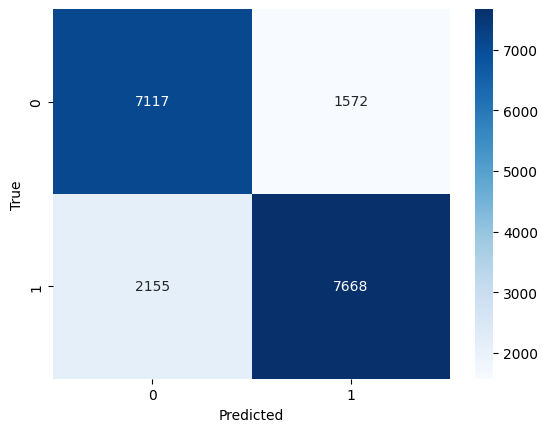

In [ ]:
y_predic_ = model_reservas_1.predict(x_test_scaled)
y_predic_cat = np.where(y_predic_>0.4,1,0) #Seteamos un corte en los datos para determinar si cancelo o no

ds_validacion=pd.DataFrame(y_predic_cat,y_test).reset_index() #Armamos un dataset
ds_validacion.columns=['y_pred','y_real'] #Nombramos las columnas

metricas(ds_validacion.y_pred,ds_validacion.y_real) #Dividimos el dataset

# Modelo Nº 2


In [ ]:
# Calculamos la cantidad de clases
cant_clases = len(np.unique(y_train)) #Nuestro target
d_in = len(x_train.columns) #Parametros de entrenamiento

model_reservas_2 = keras.Sequential([
    keras.layers.Dense(64, input_shape=(d_in,), activation='relu', kernel_initializer='uniform'),
    keras.layers.Dense(32, activation='relu', kernel_initializer='uniform'),
    keras.layers.Dense(16, activation='relu', kernel_initializer='uniform'),
    keras.layers.Dense(1, activation='sigmoid')])

#Mostramos los resultados
model_reservas_2.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                4480      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 7105 (27.75 KB)
Trainable params: 7105 (27.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_train.values

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
model_reservas_2.compile(
    optimizer = keras.optimizers.SGD(learning_rate = 0.1),
    loss = 'binary_crossentropy', #Como mi salida es binaria uso binary_crossentropy

      metrics=['accuracy']
)

cant_epochs = 100
h_model_reservas_2 = model_reservas_2.fit(x_train_scaled, y_train, epochs = cant_epochs, batch_size = 16, verbose = False )

In [ ]:
y_predic_res = model_reservas_2.predict(x_test_scaled) #Realizamos el predict

579/579 [==============================] - 1s 2ms/step


In [ ]:
y_predic_ = model_reservas_2.predict(x_test_scaled)
y_predic_cat = np.where(y_predic_>0.4,1,0) #Seteamos un corte en los datos para determinar si cancelo o no

ds_validacion=pd.DataFrame(y_predic_cat,y_test).reset_index() #Armamos un dataset
ds_validacion.columns=['y_pred','y_real'] #Nombramos las columnas


579/579 [==============================] - 1s 2ms/step


              precision    recall  f1-score   support

           0       0.79      0.86      0.82      8591
           1       0.87      0.81      0.84      9921

    accuracy                           0.83     18512
   macro avg       0.83      0.83      0.83     18512
weighted avg       0.83      0.83      0.83     18512



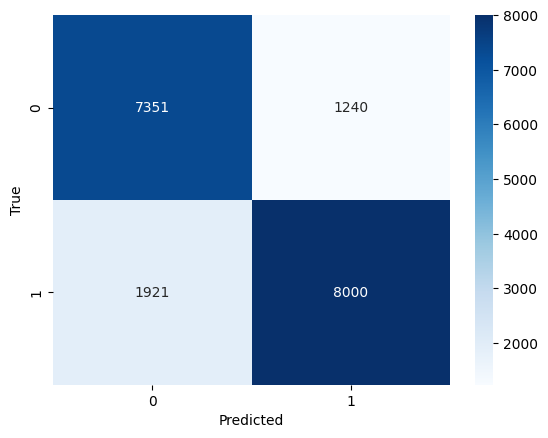

In [ ]:
metricas(ds_validacion.y_pred,ds_validacion.y_real) #Dividimos el dataset

# Modelo Nº 3


In [ ]:
# Calculamos la cantidad de clases
cant_clases = len(np.unique(y_train)) #Nuestro target
d_in = len(x_train.columns) #Parametros de entrenamiento

model_reservas_3 = keras.Sequential([
    keras.layers.Dense(64, input_shape=(d_in,), activation='relu', kernel_initializer='uniform'),
    keras.layers.Dense(32, activation='tanh', kernel_initializer='uniform'),
    keras.layers.Dense(16, activation='tanh', kernel_initializer='uniform'),
    keras.layers.Dense(1, activation='sigmoid')])

#Mostramos los resultados
model_reservas_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                4480      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 7105 (27.75 KB)
Trainable params: 7105 (27.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_train.values

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
model_reservas_3.compile(
    optimizer = keras.optimizers.SGD(learning_rate = 0.1),
    loss = 'binary_crossentropy', #Como mi salida es binaria uso binary_crossentropy

      metrics=['accuracy']
)

cant_epochs = 100
h_model_reservas_3 = model_reservas_3.fit(x_train_scaled, y_train, epochs = cant_epochs, batch_size = 16, verbose = False )

In [ ]:
y_predic_res = model_reservas_3.predict(x_test_scaled) #Realizamos el predict

579/579 [==============================] - 1s 2ms/step


In [ ]:
y_predic_ = model_reservas_3.predict(x_test_scaled)
y_predic_cat = np.where(y_predic_>0.4,1,0) #Seteamos un corte en los datos para determinar si cancelo o no

ds_validacion=pd.DataFrame(y_predic_cat,y_test).reset_index() #Armamos un dataset
ds_validacion.columns=['y_pred','y_real'] #Nombramos las columnas

579/579 [==============================] - 1s 2ms/step


              precision    recall  f1-score   support

           0       0.81      0.83      0.82      9123
           1       0.83      0.81      0.82      9389

    accuracy                           0.82     18512
   macro avg       0.82      0.82      0.82     18512
weighted avg       0.82      0.82      0.82     18512



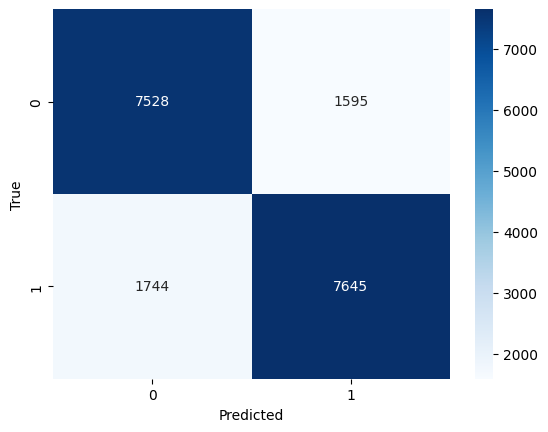

In [ ]:
metricas(ds_validacion.y_pred,ds_validacion.y_real) #Dividimos el dataset

# Modelo Nº 4

In [ ]:
# Calculamos la cantidad de clases
cant_clases = len(np.unique(y_train)) #Nuestro target
d_in = len(x_train.columns) #Parametros de entrenamiento

model_reservas_4 = keras.Sequential([
    keras.layers.Dense(300, input_shape=(d_in,), activation='relu', kernel_initializer='uniform'),
    keras.layers.Dense(250, activation='tanh', kernel_initializer='uniform'),
    keras.layers.Dense(200, activation='tanh', kernel_initializer='uniform'),
    keras.layers.Dense(150, activation='tanh', kernel_initializer='uniform'),
    keras.layers.Dense(100, activation='tanh', kernel_initializer='uniform'),
    keras.layers.Dense(1, activation='sigmoid')])

#Mostramos los resultados
model_reservas_4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 300)               21000     
                                                                 
 dense_21 (Dense)            (None, 250)               75250     
                                                                 
 dense_22 (Dense)            (None, 200)               50200     
                                                                 
 dense_23 (Dense)            (None, 150)               30150     
                                                                 
 dense_24 (Dense)            (None, 100)               15100     
                                                                 
 dense_25 (Dense)            (None, 1)                 101       
                                                                 
Total params: 191801 (749.22 KB)
Trainable params: 191

In [ ]:
y_train.values

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
model_reservas_4.compile(
    optimizer = keras.optimizers.SGD(learning_rate = 0.1),
    loss = 'binary_crossentropy', #Como mi salida es binaria uso binary_crossentropy

      metrics=['accuracy']
)

cant_epochs = 100
h_model_reservas_4 = model_reservas_4.fit(x_train_scaled, y_train, epochs = cant_epochs, batch_size = 16, verbose = False )

In [ ]:
y_predic_res = model_reservas_4.predict(x_test_scaled) #Realizamos el predict

579/579 [==============================] - 1s 2ms/step


In [ ]:
y_predic_ = model_reservas_4.predict(x_test_scaled)
y_predic_cat = np.where(y_predic_>0.4,1,0) #Seteamos un corte en los datos para determinar si cancelo o no

ds_validacion=pd.DataFrame(y_predic_cat,y_test).reset_index() #Armamos un dataset
ds_validacion.columns=['y_pred','y_real'] #Nombramos las columnas

579/579 [==============================] - 2s 3ms/step


              precision    recall  f1-score   support

           0       0.81      0.83      0.82      9053
           1       0.84      0.82      0.83      9459

    accuracy                           0.83     18512
   macro avg       0.83      0.83      0.83     18512
weighted avg       0.83      0.83      0.83     18512



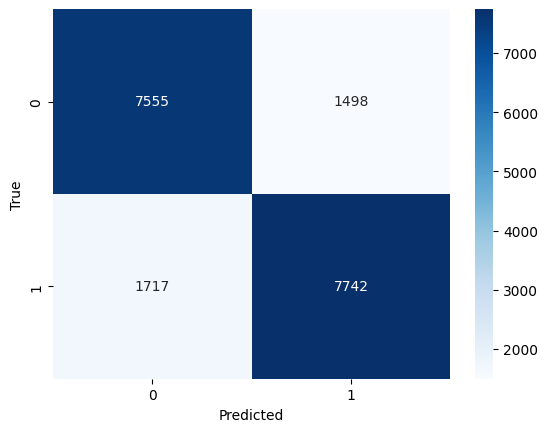

In [ ]:
metricas(ds_validacion.y_pred,ds_validacion.y_real) #Dividimos el dataset

# Modelo Nº 5

In [ ]:
# Calculamos la cantidad de clases
cant_clases = len(np.unique(y_train)) #Nuestro target
d_in = len(x_train.columns) #Parametros de entrenamiento

model_reservas_5 = keras.Sequential([
    keras.layers.Dense(300, input_shape=(d_in,), activation='relu', kernel_initializer='uniform'),
    keras.layers.Dense(250, activation='tanh', kernel_initializer='uniform'),
    keras.layers.Dense(200, activation='tanh', kernel_initializer='uniform'),
    keras.layers.Dense(150, activation='tanh', kernel_initializer='uniform'),
    keras.layers.Dense(100, activation='tanh', kernel_initializer='uniform'),
    keras.layers.Dense(1, activation='sigmoid')])

#Mostramos los resultados
model_reservas_5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 300)               21000     
                                                                 
 dense_27 (Dense)            (None, 250)               75250     
                                                                 
 dense_28 (Dense)            (None, 200)               50200     
                                                                 
 dense_29 (Dense)            (None, 150)               30150     
                                                                 
 dense_30 (Dense)            (None, 100)               15100     
                                                                 
 dense_31 (Dense)            (None, 1)                 101       
                                                                 
Total params: 191801 (749.22 KB)
Trainable params: 191

In [ ]:
y_train.values

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
model_reservas_5.compile(
    optimizer = keras.optimizers.SGD(learning_rate = 0.1),
    loss = 'binary_crossentropy', #Como mi salida es binaria uso binary_crossentropy

      metrics=['accuracy']
)

cant_epochs = 50
h_model_reservas_5 = model_reservas_5.fit(x_train_scaled, y_train, epochs = cant_epochs, batch_size = 16, verbose = False )

In [ ]:
y_predic_res = model_reservas_5.predict(x_test_scaled) #Realizamos el predict

579/579 [==============================] - 1s 2ms/step


In [ ]:
y_predic_ = model_reservas_5.predict(x_test_scaled)
y_predic_cat = np.where(y_predic_>0.4,1,0) #Seteamos un corte en los datos para determinar si cancelo o no

ds_validacion=pd.DataFrame(y_predic_cat,y_test).reset_index() #Armamos un dataset
ds_validacion.columns=['y_pred','y_real'] #Nombramos las columnas

579/579 [==============================] - 1s 2ms/step


              precision    recall  f1-score   support

           0       0.75      0.88      0.81      7898
           1       0.90      0.78      0.83     10614

    accuracy                           0.82     18512
   macro avg       0.82      0.83      0.82     18512
weighted avg       0.83      0.82      0.82     18512



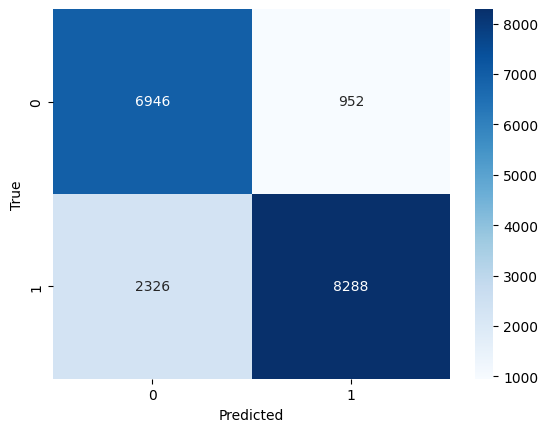

In [ ]:
metricas(ds_validacion.y_pred,ds_validacion.y_real) #Dividimos el dataset

#Modelo Nº 6

In [ ]:
# Calculamos la cantidad de clases
cant_clases = len(np.unique(y_train)) #Nuestro target
d_in = len(x_train.columns) #Parametros de entrenamiento

model_reservas_6 = keras.Sequential([
    keras.layers.Dense(300, input_shape=(d_in,), activation='relu', kernel_initializer='uniform'),
    keras.layers.Dense(250, activation='relu', kernel_initializer='uniform'),
    keras.layers.Dense(200, activation='relu', kernel_initializer='uniform'),
    keras.layers.Dense(150, activation='relu', kernel_initializer='uniform'),
    keras.layers.Dense(100, activation='relu', kernel_initializer='uniform'),
    keras.layers.Dense(1, activation='sigmoid')])

#Mostramos los resultados
model_reservas_6.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 300)               21000     
                                                                 
 dense_39 (Dense)            (None, 250)               75250     
                                                                 
 dense_40 (Dense)            (None, 200)               50200     
                                                                 
 dense_41 (Dense)            (None, 150)               30150     
                                                                 
 dense_42 (Dense)            (None, 100)               15100     
                                                                 
 dense_43 (Dense)            (None, 1)                 101       
                                                                 
Total params: 191801 (749.22 KB)
Trainable params: 191

In [ ]:
y_train.values

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
model_reservas_6.compile(
    optimizer = keras.optimizers.SGD(learning_rate = 0.1),
    loss = 'binary_crossentropy', #Como mi salida es binaria uso binary_crossentropy

      metrics=['AUC']
)

cant_epochs = 100
h_model_reservas_6 = model_reservas_6.fit(x_train_scaled, y_train, epochs = cant_epochs, batch_size = 16, verbose = False )

In [ ]:
y_predic_res = model_reservas_6.predict(x_test_scaled) #Realizamos el predict

579/579 [==============================] - 1s 2ms/step


In [ ]:
y_predic_ = model_reservas_6.predict(x_test_scaled)
y_predic_cat = np.where(y_predic_>0.4,1,0) #Seteamos un corte en los datos para determinar si cancelo o no

ds_validacion=pd.DataFrame(y_predic_cat,y_test).reset_index() #Armamos un dataset
ds_validacion.columns=['y_pred','y_real'] #Nombramos las columnas

579/579 [==============================] - 1s 2ms/step


              precision    recall  f1-score   support

           0       0.80      0.83      0.82      8918
           1       0.84      0.81      0.82      9594

    accuracy                           0.82     18512
   macro avg       0.82      0.82      0.82     18512
weighted avg       0.82      0.82      0.82     18512



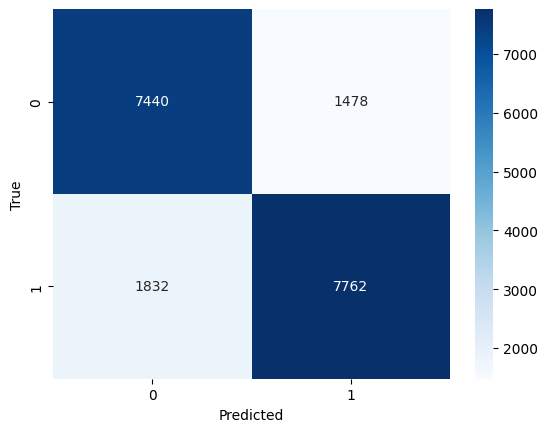

In [ ]:
metricas(ds_validacion.y_pred,ds_validacion.y_real) #Dividimos el dataset

#Modelo Nº 7

In [ ]:
# Calculamos la cantidad de clases
cant_clases = len(np.unique(y_train)) #Nuestro target
d_in = len(x_train.columns) #Parametros de entrenamiento

model_reservas_7 = keras.Sequential([
    keras.layers.Dense(300, input_shape=(d_in,), activation='relu', kernel_initializer='uniform'),
    keras.layers.Dense(250, activation='relu', kernel_initializer='uniform'),
    keras.layers.Dense(200, activation='relu', kernel_initializer='uniform'),
    keras.layers.Dense(150, activation='relu', kernel_initializer='uniform'),
    keras.layers.Dense(100, activation='relu', kernel_initializer='uniform'),
    keras.layers.Dense(50, activation='relu', kernel_initializer='uniform'),
    keras.layers.Dense(1, activation='sigmoid')])

#Mostramos los resultados
model_reservas_7.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 300)               21000     
                                                                 
 dense_45 (Dense)            (None, 250)               75250     
                                                                 
 dense_46 (Dense)            (None, 200)               50200     
                                                                 
 dense_47 (Dense)            (None, 150)               30150     
                                                                 
 dense_48 (Dense)            (None, 100)               15100     
                                                                 
 dense_49 (Dense)            (None, 50)                5050      
                                                                 
 dense_50 (Dense)            (None, 1)               

In [ ]:
y_train.values

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
model_reservas_7.compile(
    optimizer = keras.optimizers.SGD(learning_rate = 0.01),
    loss = 'binary_crossentropy', #Como mi salida es binaria uso binary_crossentropy

      metrics=['AUC']
)

cant_epochs = 30
h_model_reservas_7 = model_reservas_7.fit(x_train_scaled, y_train, epochs = cant_epochs, batch_size = 60, verbose = False )

In [ ]:
y_predic_res = model_reservas_7.predict(x_test_scaled) #Realizamos el predict

579/579 [==============================] - 1s 2ms/step


In [ ]:
y_predic_ = model_reservas_7.predict(x_test_scaled)
y_predic_cat = np.where(y_predic_>0.4,1,0) #Seteamos un corte en los datos para determinar si cancelo o no

ds_validacion=pd.DataFrame(y_predic_cat,y_test).reset_index() #Armamos un dataset
ds_validacion.columns=['y_pred','y_real'] #Nombramos las columnas

579/579 [==============================] - 1s 2ms/step


              precision    recall  f1-score   support

           0       0.79      0.86      0.82      8516
           1       0.87      0.80      0.84      9996

    accuracy                           0.83     18512
   macro avg       0.83      0.83      0.83     18512
weighted avg       0.83      0.83      0.83     18512



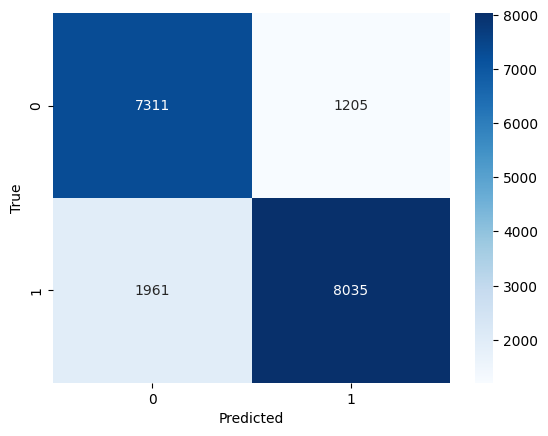

In [ ]:
metricas(ds_validacion.y_pred,ds_validacion.y_real) #Dividimos el dataset

# Importamos el test para la preddiccion en Kaggle




In [ ]:
ds_hotels_test = pd.read_csv("hotels_test.csv")
ds_h_test = ds_hotels_test.copy()

In [ ]:
ds_h_test.fillna(0, inplace=True)

In [ ]:
filas_totales=ds_hotels_test.shape[0]
print(ds_h_test.isna().sum()/filas_totales*100)

hotel                             0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
company                           0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr         

In [ ]:
month_number_in_season = {
    'January': 0,
    'February': 0,
    'March': 0,
    'April': 1,
    'May': 1,
    'June': 1,
    'July': 1,
    'August': 1,
    'September': 1,
    'October': 1,
    'November': 0,
    'December': 0
}
ds_h_test['arrival_date_month'] = ds_h_test['arrival_date_month'].map(month_number_in_season)

In [ ]:
country_counts  = ds_h_test["country"].value_counts()

# Obtenemos los 10 países principales
top_10_countries = country_counts.head(10).index

# Reemplazo los países que no están en el top 10 con "otros"
ds_h_test["country"] = ds_h_test["country"].apply(lambda x: x if x in top_10_countries else "otros")

In [ ]:
ds_h_test.isna().any()

hotel                             False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
country                           False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                             False
company                           False
days_in_waiting_list              False


In [ ]:
ds_h_test.isin(['Undefined']).sum()

hotel                               0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                              238
country                             0
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_type                       0
adr         

In [ ]:
#One hot encoding para variables categoricas
var_cual = ["hotel", "arrival_date_month", "meal", "country", "market_segment",
"distribution_channel", "reserved_room_type", "assigned_room_type", "deposit_type",
"customer_type"]
ds_h_test = pd.get_dummies(ds_h_test, columns=var_cual, drop_first=True)

ds_h_test.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,277,2016,46,7,1,2,2,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,286,2016,20,11,0,4,2,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,2016,35,23,0,1,3,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,196,2016,44,29,2,5,2,2.0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,232,2016,48,26,2,1,2,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
print(ds_h_test.isna().sum()/filas_totales*100)

lead_time                        0.0
arrival_date_year                0.0
arrival_date_week_number         0.0
arrival_date_day_of_month        0.0
stays_in_weekend_nights          0.0
                                ... 
deposit_type_Non Refund          0.0
deposit_type_Refundable          0.0
customer_type_Group              0.0
customer_type_Transient          0.0
customer_type_Transient-Party    0.0
Length: 70, dtype: float64


In [ ]:
diff_cols_df2 = set(hotels_tr.columns) - set(ds_h_test.columns)

# Agrego las columnas faltantes en ds_h_test y las inicializo en false
for col in diff_cols_df2:
    ds_h_test[col] = np.False_

# Solo me quedo con las columnas de ds_h_test que esten en ds
df_test = ds_h_test[hotels_tr.columns]

df_test.head()

,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,277,2016,7,1,2,2,0.0,0,0,0,...,0,0,0,0,False,1,0,0,1,0
1,286,2016,11,0,4,2,0.0,0,0,0,...,0,0,0,0,False,0,0,0,0,1
2,0,2016,23,0,1,3,0.0,0,0,0,...,0,0,0,0,False,0,0,0,1,0
3,196,2016,29,2,5,2,2.0,0,0,0,...,1,0,0,0,False,0,0,0,1,0
4,232,2016,26,2,1,2,0.0,0,0,0,...,0,0,0,0,False,1,0,0,1,0


In [ ]:
x_submit = df_test

In [ ]:
#Escalamos los datos de train de nuestro data set
scaler = StandardScaler()
x_submit_scaled = scaler.fit_transform(x_submit)

Prediccion

In [ ]:
model_reservas_7.save('rn.pkl') #guardamos el modelo

In [ ]:
nn = tf.keras.models.load_model("rn.pkl")

In [ ]:
y_pred_nn = nn.predict(x_submit_scaled)
y_pred_nn = np.where(y_pred_nn>0.4,1,0) #Seteamos un corte en los datos para determinar si cancelo o no

830/830 [==============================] - 2s 2ms/step


In [ ]:
y_pred_nn.flatten()

array([1, 1, 0, ..., 1, 1, 0])

submit

In [ ]:
ddf_submit_nn = pd.DataFrame({'id': ds_h_test['id'],'is_canceled':y_pred_nn.flatten()})
df_submit_nn.to_csv('predict_kaggle.csv', index = False)